In [18]:
%pip install opencv-python-headless matplotlib numpy

import cv2 #opencv image
import numpy as np #array
import string
import os
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv-python-headless in c:\users\aksha\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (4.11.0.86)




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\aksha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
#ASCII-CONVERSION

d={chr(i):i for i in range(255)} #character to ascii
c={i:chr(i) for i in range(255)} #ascii to character


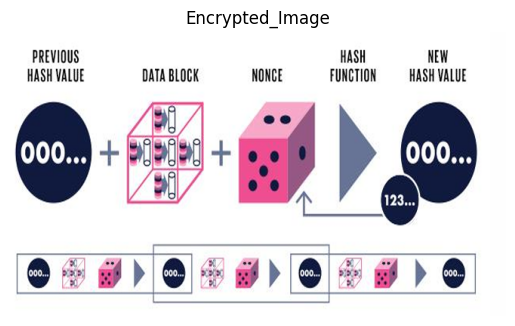

In [20]:
#load the image
image_path = r"D:\Amarjeet Admission\2 Year\4th semester\Edunet CyberSecurity project\image.png"
x = cv2.imread(image_path)

xrgb = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.title("Encrypted_Image")
plt.axis('off')
plt.show()

In [21]:
x.shape

(376, 657, 3)

In [22]:
key="123"
text="Amarjeet"

In [23]:
key

'123'

In [24]:
#ASCII Values

text_ascii = [d[ch] for ch in text] #list of ascii values of text characters
key_ascii = [d[ch] for ch in key]   #list of ascii of key

print(text_ascii)
print(key_ascii)

[65, 109, 97, 114, 106, 101, 101, 116]
[49, 50, 51]


In [ ]:
#encrypt using pixel modification

x_enc = x.copy()
n = 0 #number of rows
m = 0 #number of coloumns
z =0 #colour panel
l = len(text)
kl = 0



for i in range(l):
  orig_val=x_enc[n,m,z]
  new_val= d[text[i]]^d[key[kl]] #important
  x_enc[n,m,z]=new_val

  print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}'(ASCII {d[key[kl]]})={new_val} at pixel ({n},{m},{z}) [original={orig_val}]")
  n = n + 1
  m = m+1
  m = (m+1)%3
  z = (z+1)%3
  kl = (kl+1)%len(key)







Embedding 'A' (ASCII 65) XOR '1'(ASCII 49)=112 at pixel (0,0,0) [original=255]
Embedding 'm' (ASCII 109) XOR '2'(ASCII 50)=95 at pixel (1,2,1) [original=255]
Embedding 'a' (ASCII 97) XOR '3'(ASCII 51)=82 at pixel (2,1,2) [original=255]
Embedding 'r' (ASCII 114) XOR '1'(ASCII 49)=67 at pixel (3,0,0) [original=255]
Embedding 'j' (ASCII 106) XOR '2'(ASCII 50)=88 at pixel (4,2,1) [original=255]
Embedding 'e' (ASCII 101) XOR '3'(ASCII 51)=86 at pixel (5,1,2) [original=255]
Embedding 'e' (ASCII 101) XOR '1'(ASCII 49)=84 at pixel (6,0,0) [original=255]
Embedding 't' (ASCII 116) XOR '2'(ASCII 50)=70 at pixel (7,2,1) [original=255]


In [26]:
cv2.imwrite("encrypt.jpg", x_enc)

True

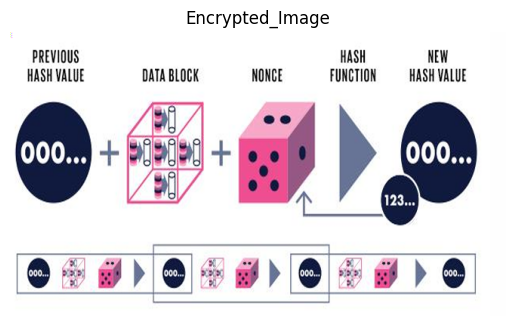

In [27]:
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.title("Encrypted_Image")
plt.axis('off')
plt.show()

DECRYPT

In [28]:
#DEcrypt
n,m,z=0,0,0
kl=0
decrypt=""
for i in range(l):
  val = x_enc[n,m,z]
  orig_char = c[val^d[key[kl]]]
  decrypt+=orig_char

  print(f"Decrypting pixel ({n},{m},{z}):{val} XOR {d[key[kl]]} -> '{orig_char}'")

  n = n + 1
  m = m+1
  m = (m+1)%3
  z = (z+1)%3
  kl = (kl+1)%len(key)

print(f"Decrypted text: {decrypt}")

Decrypting pixel (0,0,0):112 XOR 49 -> 'A'
Decrypting pixel (1,2,1):95 XOR 50 -> 'm'
Decrypting pixel (2,1,2):82 XOR 51 -> 'a'
Decrypting pixel (3,0,0):67 XOR 49 -> 'r'
Decrypting pixel (4,2,1):88 XOR 50 -> 'j'
Decrypting pixel (5,1,2):86 XOR 51 -> 'e'
Decrypting pixel (6,0,0):84 XOR 49 -> 'e'
Decrypting pixel (7,2,1):70 XOR 50 -> 't'
Decrypted text: Amarjeet
